This is the original image: 'Original bilby.png'


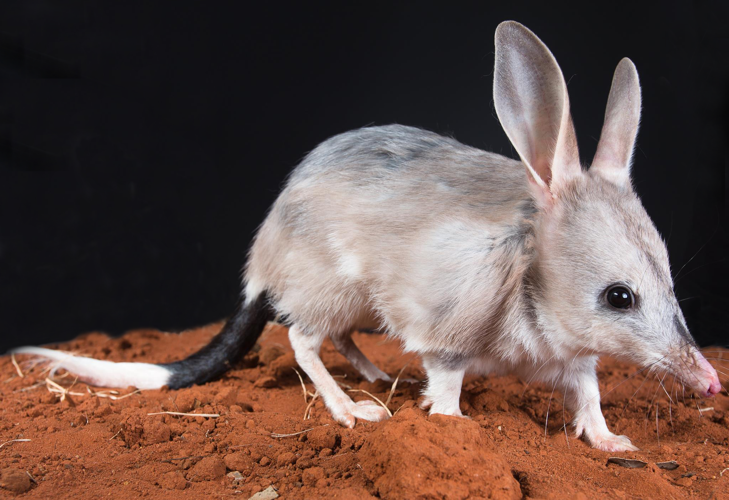

This is the converted image: 'Grey bilby.png'


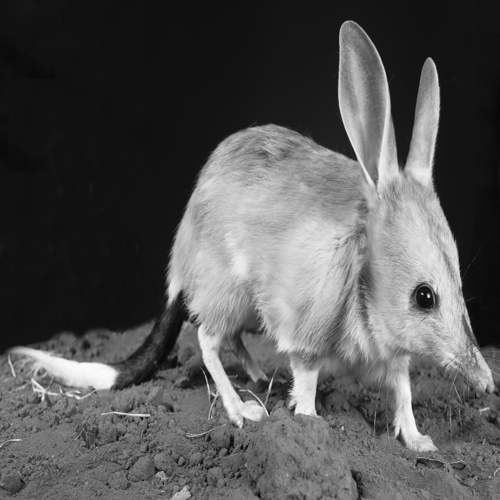

This is the blurred image: 'Blurry bilby.png' 


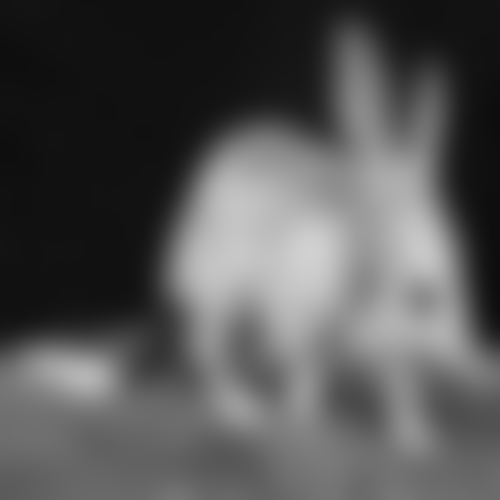

This is a plot comparing the pixel intensity distributions of the original and blurred images:


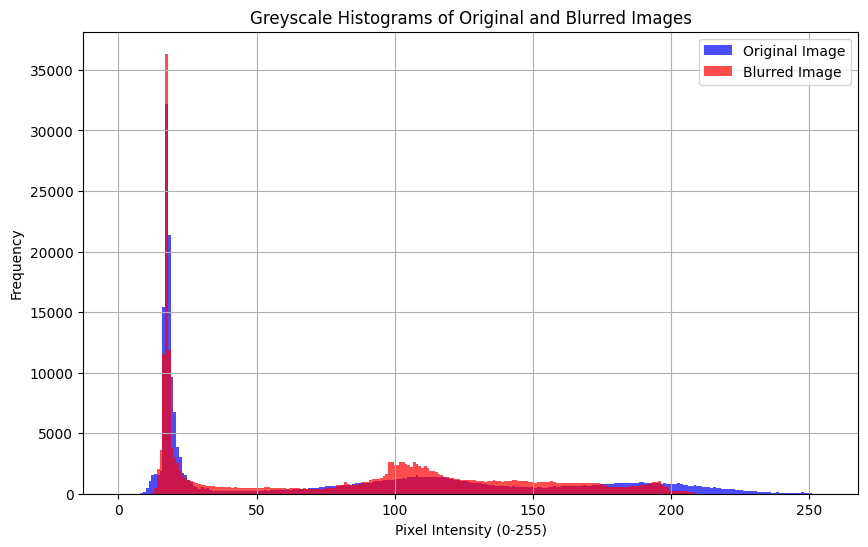

STATISTICAL ANALYSIS:

KS statistic 0.096 
The KS statistic indicates the similarity of the two plots.
The difference in pixel intensity between the two images is approximately 9.6%

p-value 0.0
There is a statistically significant difference between the original and blurred images, (p < 0.05)


This is the resized blurred image: 'Small blurry bilby.png'


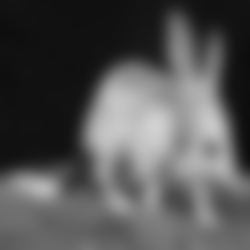

I hope that was fun?


In [54]:
#Ensure that relevant libraries are installed into your virtual environment
""" Active the virtual environment first, then run the following command in your terminal:
    $ pip install [package name], for example:
    $ pip install Pillow"""

#Import necessary libraries/packages into the notebook

from PIL import Image, ImageFilter        #Pillow library for manipulating images
from IPython.display import display       #Included to monitor image manpulation as code progresses. IPython.display module suggested by ChatGPT to display images within Jupyter Notebook
import matplotlib.pyplot as plt           #Matplotlib library for plotting histograms
import numpy as np                        #Numpy library for numerical operations on arrays
from scipy.stats import ks_2samp          #Scipy library for statistical analysis (Kolmogorov-Smirnov test suggested by ChatGPT)




#Opening the original image and viewing it within the notebook
im = Image.open("Original bilby.png")
print("This is the original image: 'Original bilby.png'")
display(im)



#Convert the image to required format (greyscale, 500x500 pixels)
im_convert = im.convert("L")
im_convert = im_convert.resize((500, 500))

#Saving the converted image and viewing it within the notebook
im_convert.save("Grey bilby.png")
print("This is the converted image: 'Grey bilby.png'")
display(im_convert)




#Blur the image using the Gaussian blur filter
im_blur = im_convert.filter(ImageFilter.GaussianBlur(radius=15))

#Saving the blurred image and viewing it within the noteboo
im_blur.save("Blurry bilby.png")
print("This is the blurred image: 'Blurry bilby.png' ")
display(im_blur)



#Converting the images to numpy arrays
im_convert_array = np.array(im_convert).flatten()  #Conversion of the image data to a numpy array for plotting a histogram [alternative to Pillow .histogram() method]
im_blur_array = np.array(im_blur).flatten()


#Plotting histogram comparison of gresyscale and blurred images
hist_original, bins = np.histogram(im_convert_array, bins=256, range=(0,255), density=True)
hist_blur, _ = np.histogram(im_blur_array, bins=256, range=(0,255), density=True)
plt.figure(figsize=(10,6))
plt.hist(im_convert_array, bins=256, range=(0,255), color="blue", alpha=0.7, label='Original Image')
plt.hist(im_blur_array, bins=256, range=(0,255), color="red", alpha=0.7, label='Blurred Image')
plt.title("Greyscale Histograms of Original and Blurred Images")
plt.xlabel("Pixel Intensity (0-255)")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
print("This is a plot comparing the pixel intensity distributions of the original and blurred images:")
plt.show()




#Performing Statistical Analysis
ks_stat, p_value = ks_2samp(im_convert_array, im_blur_array)          #ChatGPT suggested using ks_2samp for statistical analysis
round_ks_stat, round_p_value = round(ks_stat, 3), round(p_value, 3)   #Rounding the KS statistic and p-value to 3 decimal places for better readability


#Printing statistical results and interpretation
print("STATISTICAL ANALYSIS:\n\nKS statistic {} \nThe KS statistic indicates the similarity of the two plots.\nThe difference in pixel intensity between the two images is approximately {}%".format(round_ks_stat, round_ks_stat * 100))
print("\np-value {}".format(round_p_value))

if p_value < 0.05:
    print("There is a statistically significant difference between the original and blurred images, (p < 0.05)")
else:
    print("There is no statistically significant difference between the original and blurred images")





#Resizing the blurred image to 250x250 pixels
im_blur_resize = im_blur.resize((250, 250))

#Saving the blurred image (250x250) and viewing it within the notebook
im_blur_resize.save("Small blurry bilby.png")
print("\n\nThis is the resized blurred image: 'Small blurry bilby.png'")
display(im_blur_resize)


print("I hope that was fun?")